# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [58]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [27]:
# Check the shape of your data
spaceship.shape

(8693, 14)

**Check for data types**

In [28]:
# Check for data types
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [29]:
# Check for missing values
spaceship.isna().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [8]:
# Check for number of missing values
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [30]:
# Drop rows containing missing values
spaceship = spaceship.dropna()

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [31]:
# Cabin is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}
spaceship['Cabin'] = spaceship['Cabin'].apply(lambda x: x[0])


- Drop PassengerId and Name

In [32]:
# Drop PassengerId and Name
spaceship = spaceship.drop(['PassengerId', 'Name'], axis=1)


- For non-numerical columns, do dummies.

In [33]:
# For non-numerical columns, do dummies.
# Asegurarse de que las columnas booleanas estén correctamente tipificadas como bool
spaceship['Transported'] = spaceship['Transported'].astype(bool)
# Seleccionar solo columnas no numéricas
non_numeric_columns = spaceship.select_dtypes(include=['object']).columns

# Convertir columnas no numéricas en dummies
spaceship = pd.get_dummies(spaceship, columns=non_numeric_columns)

In [34]:
spaceship.shape

(6606, 25)

In [35]:
spaceship.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True', 'Cabin_A',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'],
      dtype='object')

**Perform Train Test Split**

In [37]:
# Perform Train Test Split
features = spaceship.drop(columns=['Transported'])
target = spaceship['Transported']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [42]:
# In this exercise we will be using KNN as our predictive model.
knn = KNeighborsClassifier(n_neighbors=3)

In [43]:
# Fit the model to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
# Convert X_test and y_test in NumPy arrays 
X_test_array = X_test.values
y_test_array = y_test.values

In [55]:
# Make predictions
y_pred = knn.predict(X_test_array)

/Users/natalialabrador/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


- Evaluate your model's performance. Comment it

In [57]:
# Evaluate your model's performance. Comment it
accuracy = knn.score(X_test_array, y_test)
accuracy

/Users/natalialabrador/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.764750378214826

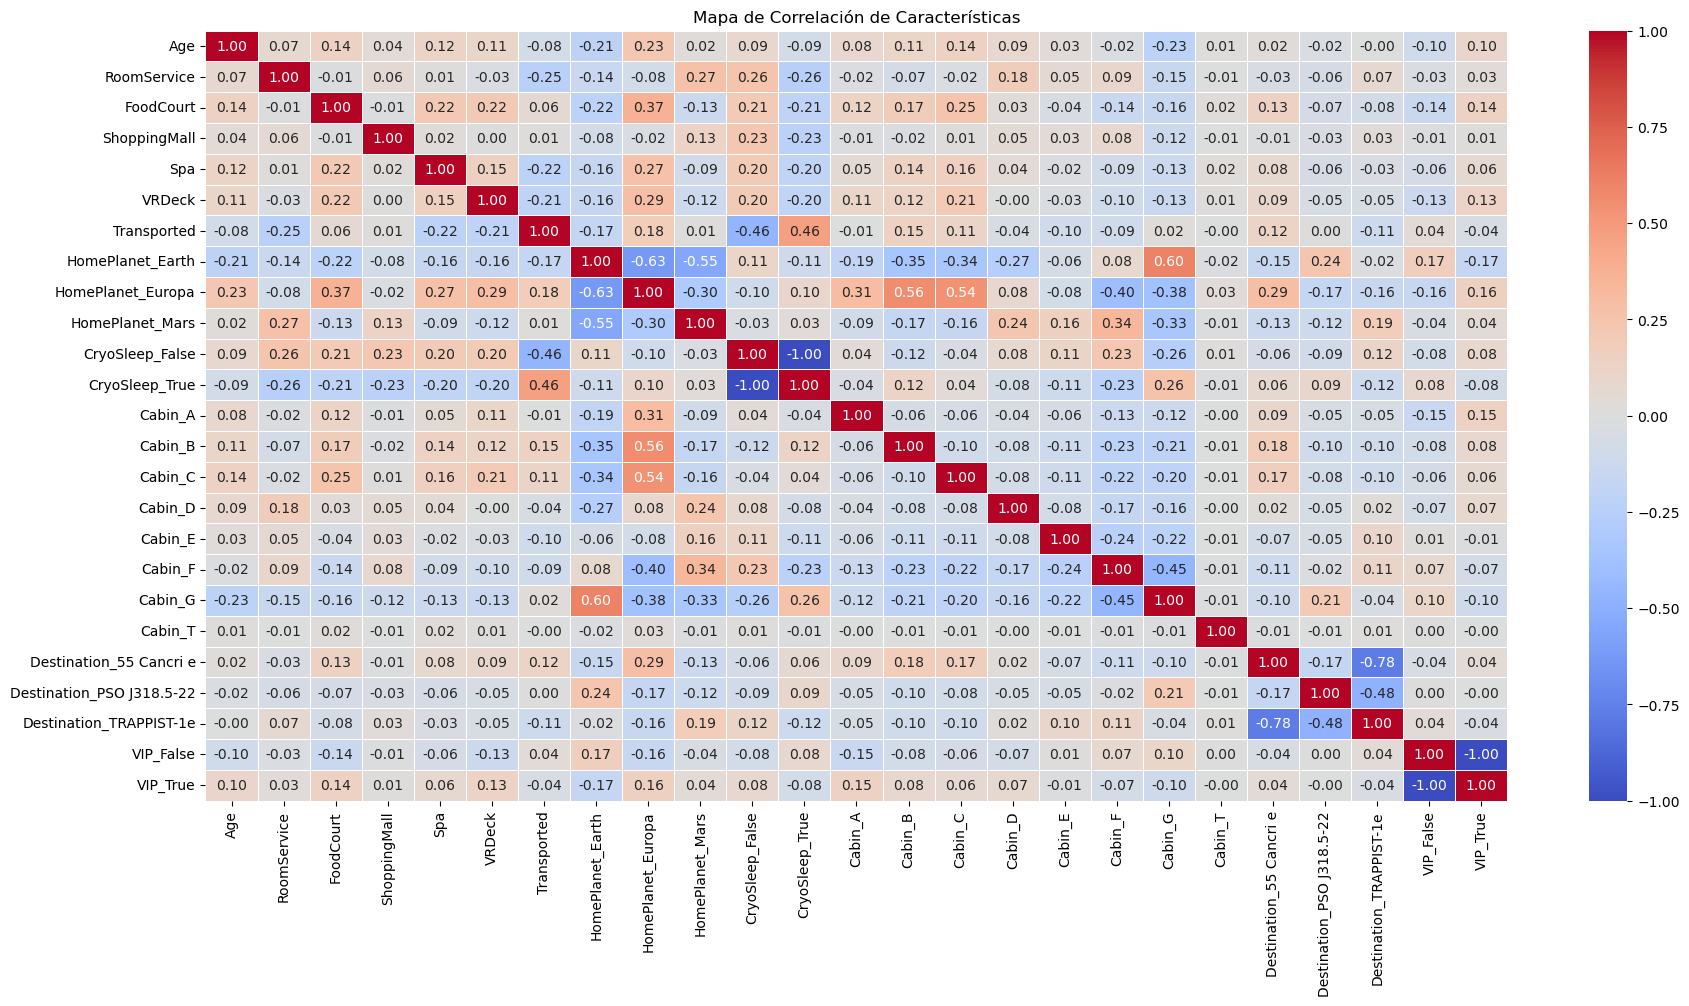

In [60]:
# Mapa de correlación
# Calcular la matriz de correlación
correlation_matrix = spaceship.corr()

# Crear el mapa de correlación
plt.figure(figsize=(21, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlación de Características')
plt.show()